# Projet Python

## 1. IMPORTATION DES LIBRAIRIES ET DES DONNEES

In [1]:
import pandas as pd        
import numpy as np        
import matplotlib.pyplot as plt 
import seaborn as sns      

In [2]:
# Paramétrer le style de seaborn
sns.set(style="whitegrid")

In [3]:
# Chargement de la base 
df = pd.read_csv("sales_data.csv")

print("Aperçu des données :")
df.head()

Aperçu des données :


,Date,Nom_Client,Produit,Quantité,Prix_Unitaire,Total,Mode_de_Paiement,Adresse_Livraison
0,2025-01-03,Emma Smith,NaN,2.0,-7.92,-15.84,Espèces,Toulouse~France
1,2025-01-22,Emma Smith,Table,7.0,69.84,488.88,Espèces,"Nice, FR"
2,2025-01-26,Emma Smith,Bureau,0.0,213.14,0.00,Espèces,Toulouse~France
3,2025-01-07,Frank Ocean,Chaise,6.0,210.97,1370.03,Espèces,"Bordeaux, France"
4,2025-01-18,Henry,Chaise,0.0,21.02,0.00,PayPal,"Lille, France"


## 2. EXPLORATION DU JEU DE DONNEES

In [4]:
# Examen de la structure des données
print("\nInformation sur les colonnes :")
df.info()


Information sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               990 non-null    object 
 1   Nom_Client         866 non-null    object 
 2   Produit            768 non-null    object 
 3   Quantité           980 non-null    float64
 4   Prix_Unitaire      977 non-null    float64
 5   Total              959 non-null    float64
 6   Mode_de_Paiement   766 non-null    object 
 7   Adresse_Livraison  907 non-null    object 
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
df.isnull().sum()


Valeurs manquantes par colonne :


Date                  10
Nom_Client           134
Produit              232
Quantité              20
Prix_Unitaire         23
Total                 41
Mode_de_Paiement     234
Adresse_Livraison     93
dtype: int64

In [6]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
df.describe()


Statistiques descriptives :


,Quantité,Prix_Unitaire,Total
count,980.000000,977.000000,959.000000
mean,5.066327,123.465844,621.941345
std,3.090843,101.355498,734.841937
min,0.000000,-47.940000,-477.600000
25%,2.000000,30.550000,30.805000
50%,5.000000,121.120000,382.130000
75%,8.000000,210.220000,964.790000
max,10.000000,299.130000,3259.360000


## 3. TRAITEMENT DE LA BASE

In [7]:
#  Détection et suppression des doublons 
duplicated_rows = df[df.duplicated()]
print(f"Nombre de lignes dupliquées (exactes) : {duplicated_rows.shape[0]}")
df = df.drop_duplicates()

Nombre de lignes dupliquées (exactes) : 0


In [8]:
df["Nom_Client"].unique()

array(['Emma Smith', 'Frank Ocean', 'Henry', 'Alice Martin',
       'David Pierre', 'Bob Dupont', 'Charlie', 'George & Co.', nan],
      dtype=object)

In [9]:
df["Adresse_Livraison"].unique()

array(['Toulouse~France', 'Nice, FR', 'Bordeaux, France', 'Lille, France',
       'Paris, France', 'Marseille', nan, 'Lyon, France'], dtype=object)

In [10]:
df["Date"].unique()

array(['2025-01-03', '2025-01-22', '2025-01-26', '2025-01-07',
       '2025-01-18', '2025-01-01', '2025-01-13', '2025-01-29',
       '2025-01-31', '2025-01-30', '2025-01-17', '2025-01-20',
       '2025-01-25', '2025-01-19', '2025-01-12', '2025-01-11',
       '2025-01-28', '2025-01-24', '2025-01-27', nan, '2025-01-23',
       '2025-01-14', '2025-01-09', '2025-01-05', '2025-01-16',
       '2025-01-21', '2025-01-06', '2025-01-04', '2025-01-10',
       '2025-01-02', '2025-01-15', '2025-01-08'], dtype=object)

In [11]:
# Conversion de la colonne 'Date' 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [12]:
# Standardisation et nettoyage des colonne
df['Mode_de_Paiement'] = df['Mode_de_Paiement'].astype(str).str.lower().str.strip()
df['Produit'] = df['Produit'].astype(str).str.lower().str.strip().str.capitalize()
df['Nom_Client'] = df['Nom_Client'].astype(str).str.replace(r'[^A-Za-z0-9\s]', '', regex=True).str.strip()
df['Adresse_Livraison'] = df['Adresse_Livraison'].astype(str).str.replace('~', ',', regex=False).str.strip()

Une transaction valide doit au minimum contenir une date, un produit identifié, une quantité valide, un prix unitaire et un total cohérent.
Les informations secondaires (Nom_Client, Mode_de_Paiement, Adresse_Livraison) peuvent être complétées par des valeurs par défaut pour éviter une perte excessive de données.

In [13]:
# Traitement des valeurs manquantes

df['Mode_de_Paiement'] = df['Mode_de_Paiement'].replace('nan', np.nan)  
df['Mode_de_Paiement'] = df['Mode_de_Paiement'].fillna('inconnu')

df['Produit'] = df['Produit'].replace('Nan', np.nan)
df['Produit']= df['Produit'].fillna('Produit inconnu') #valeurs manquantes trop nombreuses

# Dictionnaire de normalisation des pays
corrections = { "FR": "France", "Marseille": "Marseille, France"}
df["Adresse_Livraison"] = df["Adresse_Livraison"].replace(corrections, regex=True)
df['Adresse_Livraison'] = df['Adresse_Livraison'].replace('nan', np.nan) 
df['Adresse_Livraison'] = df['Adresse_Livraison'].fillna('Adresse Inconnue')
# Extraction du pays et de la ville
df["Pays"] = df["Adresse_Livraison"].apply(lambda x: x.split(",")[-1].strip() if pd.notna(x) else "Inconnu")
df["Ville"] = df["Adresse_Livraison"].apply(lambda x: x.split(",")[0].strip() if pd.notna(x) else "Inconnu")

df['Nom_Client'] = df['Nom_Client'].replace('nan', np.nan) 
df['Nom_Client'] = df['Nom_Client'].fillna("Client Inconnu")

for col in ['Quantité', 'Prix_Unitaire', 'Total']:  # imputation de la médiane var quantitatives
    df[col] = df[col].fillna(df[col].median())

In [14]:
df["Produit"].unique()

array(['Produit inconnu', 'Table', 'Bureau', 'Chaise'], dtype=object)

In [15]:
product_sales = df.groupby('Produit')[['Total', 'Quantité', 'Prix_Unitaire']].sum().sort_values(by='Total', ascending=False)
product_sales 

,Total,Quantité,Prix_Unitaire
Produit,,,
Chaise,168075.41,1320.0,33014.34
Table,155383.96,1328.0,30349.24
Produit inconnu,144517.47,1167.0,29037.55
Bureau,144132.24,1250.0,31010.76


In [16]:
df[(df['Produit'] == 'Produit inconnu') & (df['Nom_Client'] == "Client Inconnu")]

,Date,Nom_Client,Produit,Quantité,Prix_Unitaire,Total,Mode_de_Paiement,Adresse_Livraison,Pays,Ville
66,2025-01-13,Client Inconnu,Produit inconnu,5.0,48.06,240.30,inconnu,"Paris, France",France,Paris
87,2025-01-22,Client Inconnu,Produit inconnu,0.0,119.32,0.00,inconnu,"Lille, France",France,Lille
109,2025-01-17,Client Inconnu,Produit inconnu,10.0,16.28,162.80,espèces,"Paris, France",France,Paris
139,2025-01-20,Client Inconnu,Produit inconnu,5.0,210.87,663.33,espèces,"Marseille, France",France,Marseille
169,2025-01-02,Client Inconnu,Produit inconnu,3.0,213.60,640.80,espèces,"Nice, France",France,Nice
193,2025-01-10,Client Inconnu,Produit inconnu,3.0,120.38,361.14,espèces,"Lyon, France",France,Lyon
236,2025-01-21,Client Inconnu,Produit inconnu,3.0,115.11,345.33,inconnu,"Paris, France",France,Paris
243,2025-01-14,Client Inconnu,Produit inconnu,7.0,36.46,255.22,paypal,"Toulouse,France",France,Toulouse
249,2025-01-21,Client Inconnu,Produit inconnu,8.0,273.12,2184.96,inconnu,"Bordeaux, France",France,Bordeaux
270,2025-01-06,Client Inconnu,Produit inconnu,5.0,63.94,319.70,paypal,"Marseille, France",France,Marseille


In [17]:
# Gestion des Valeurs Anormales et Incohérences

# Recalcul des totaux 
df['Total_Calc'] = df['Quantité'] * df['Prix_Unitaire']
# Création d'une colonne pour détecter les incohérences 
df['Incoherence'] = np.abs(df['Total'] - df['Total_Calc']) > 0.01

In [18]:
# Affichage du nombre d'incohérences détectées
print("\nNombre d'incohérences Quantité × Prix_Unitaire ≠ Total  :", df['Incoherence'].sum())

print("\nNombre d'incohérences Prix_Unitaire négatif ou nul):",df[df['Prix_Unitaire'] <= 0]['Prix_Unitaire'].count())


Nombre d'incohérences Quantité × Prix_Unitaire ≠ Total  : 130

Nombre d'incohérences Prix_Unitaire négatif ou nul): 143


In [19]:
# Création d'une colonne "Type_Transaction"
df["Type_Transaction"] = df["Prix_Unitaire"].apply(lambda x: "REMBOURSEMENT" if x < 0 else "VENTE")

df.loc[df["Prix_Unitaire"] < 0, "Prix_Unitaire"] = abs(df["Prix_Unitaire"])
df.loc[df["Total"] < 0, "Total"] = abs(df["Total"])

df["Type_Transaction"].value_counts()

Type_Transaction
VENTE            857
REMBOURSEMENT    143
Name: count, dtype: int64

In [20]:
# Correction 
# Recalculer le total pour les lignes incohérentes
df.loc[df['Incoherence'], 'Total'] = df.loc[df['Incoherence'], 'Total_Calc']

# Suppression des valeurs (prix négatif ou nul) et quantité nulle
df = df[df['Total'] > 0]
df = df[df["Quantité"] > 0]
df = df[pd.notna(df['Date'])] 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               888 non-null    datetime64[ns]
 1   Nom_Client         888 non-null    object        
 2   Produit            888 non-null    object        
 3   Quantité           888 non-null    float64       
 4   Prix_Unitaire      888 non-null    float64       
 5   Total              888 non-null    float64       
 6   Mode_de_Paiement   888 non-null    object        
 7   Adresse_Livraison  888 non-null    object        
 8   Pays               888 non-null    object        
 9   Ville              888 non-null    object        
 10  Total_Calc         888 non-null    float64       
 11  Incoherence        888 non-null    bool          
 12  Type_Transaction   888 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(4), object(7)
memory usage: 91.

In [22]:
df.isnull().sum()

Date                 0
Nom_Client           0
Produit              0
Quantité             0
Prix_Unitaire        0
Total                0
Mode_de_Paiement     0
Adresse_Livraison    0
Pays                 0
Ville                0
Total_Calc           0
Incoherence          0
Type_Transaction     0
dtype: int64

In [23]:
#Sauvegarder la base de données corrigée dans un nouveau fichier CSV

df.to_csv("sales_data_clean.csv", index=False)
print("\nLa base de données corrigée a été sauvegardée dans 'sales_data_clean.csv'.")

# Si vous utilisez Google Colab
try:
    from google.colab import files
    files.download("sales_data_clean.csv")
except ImportError:
    print("Le fichier 'sales_data_clean.csv' est disponible dans le répertoire courant.")


La base de données corrigée a été sauvegardée dans 'sales_data_clean.csv'.
Le fichier 'sales_data_clean.csv' est disponible dans le répertoire courant.


In [24]:
# Détection des outliers avec la méthode de l'IQR 
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


outliers_quantite = detect_outliers(df, 'Quantité')
print("\nNombre d'outliers détectés dans Quantité :", outliers_quantite.shape[0])

outliers_quantite = detect_outliers(df, 'Prix_Unitaire')
print("\nNombre d'outliers détectés dans Prix_unitaire :", outliers_quantite.shape[0])

outliers_quantite = detect_outliers(df, 'Total')
print("\nNombre d'outliers détectés dans Total :", outliers_quantite.shape[0])


Nombre d'outliers détectés dans Quantité : 0

Nombre d'outliers détectés dans Prix_unitaire : 0

Nombre d'outliers détectés dans Total : 21


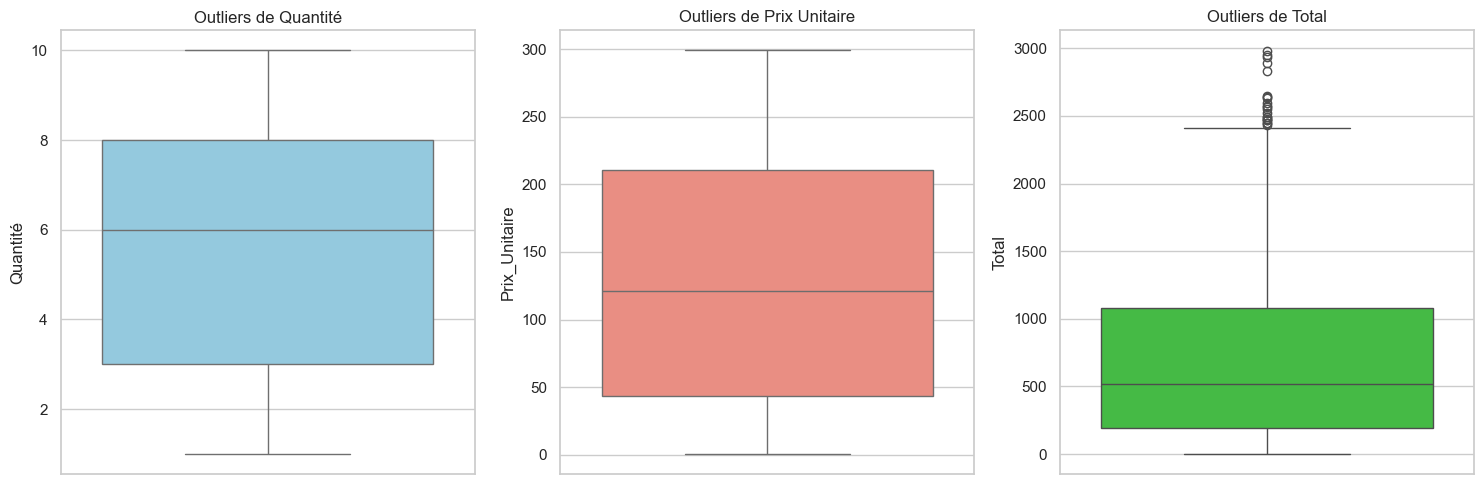

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df["Quantité"], color='skyblue')
plt.title("Outliers de Quantité")

plt.subplot(1, 3, 2)
sns.boxplot(y=df["Prix_Unitaire"], color='salmon')
plt.title("Outliers de Prix Unitaire")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["Total"], color='limegreen')
plt.title("Outliers de Total")

plt.tight_layout()
plt.show()

In [26]:
# Extraire l'année et le mois à partir de la colonne 'Date'
df['Année'] = df['Date'].dt.year
df['Mois'] = df['Date'].dt.month

## 4. ANALYSE DESCRIPTIVE

###  4.1 Analyse Univariée

#### Statistiques pour Quantité, Prix_Unitaire et Total

In [27]:
print("\nStatistiques pour Quantité :")
df['Quantité'].describe()


Statistiques pour Quantité :


count    888.000000
mean       5.529279
std        2.755591
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Quantité, dtype: float64

In [28]:
print("Asymétrie Quantité:", df['Quantité'].skew())
print("Aplatissement Quantité:", df['Quantité'].kurtosis())

Asymétrie Quantité: -0.038888673323665926
Aplatissement Quantité: -1.135008364244589


In [29]:
print("\nStatistiques pour Prix_Unitaire :")
df['Prix_Unitaire'].describe()


Statistiques pour Prix_Unitaire :


count    888.000000
mean     132.442050
std       90.753772
min        0.590000
25%       43.560000
50%      121.120000
75%      210.427500
max      299.130000
Name: Prix_Unitaire, dtype: float64

In [30]:
print("Asymétrie Prix_Unitaire:", df['Prix_Unitaire'].skew())
print("Aplatissement Prix_Unitaire:", df['Prix_Unitaire'].kurtosis())

Asymétrie Prix_Unitaire: 0.20391166004372654
Aplatissement Prix_Unitaire: -1.2460460974314067


In [31]:
print("\nStatistiques pour Total :")
df['Total'].describe()


Statistiques pour Total :


count     888.000000
mean      735.300743
std       685.719892
min         2.060000
25%       192.397500
50%       516.420000
75%      1080.240000
max      2984.200000
Name: Total, dtype: float64

In [32]:
print("Asymétrie Total:", df['Total'].skew())
print("Aplatissement Total:", df['Total'].kurtosis())

Asymétrie Total: 1.11993014851095
Aplatissement Total: 0.4065284377794982


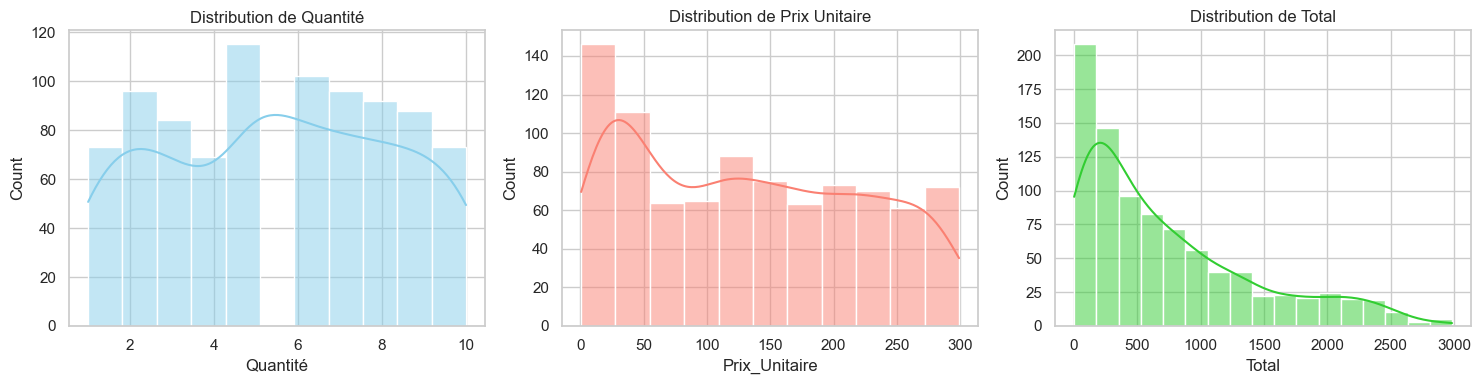

In [33]:
# Histogrammes et KDE-plots pour Quantité, Prix_Unitaire et Total
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Quantité'], kde=True, color='skyblue')
plt.title("Distribution de Quantité")

plt.subplot(1, 3, 2)
sns.histplot(df['Prix_Unitaire'], kde=True, color='salmon')
plt.title("Distribution de Prix Unitaire")

plt.subplot(1, 3, 3)
sns.histplot(df['Total'], kde=True, color='limegreen')
plt.title("Distribution de Total")

plt.tight_layout()
plt.show()

#### Répartition des modes de paiement

In [34]:
print("\nRépartition des Modes de Paiement :")
df['Mode_de_Paiement'].value_counts()


Répartition des Modes de Paiement :


Mode_de_Paiement
espèces            245
carte de crédit    221
inconnu            211
paypal             211
Name: count, dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_11188\2013646061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mode_de_Paiement', data=df, palette='pastel')


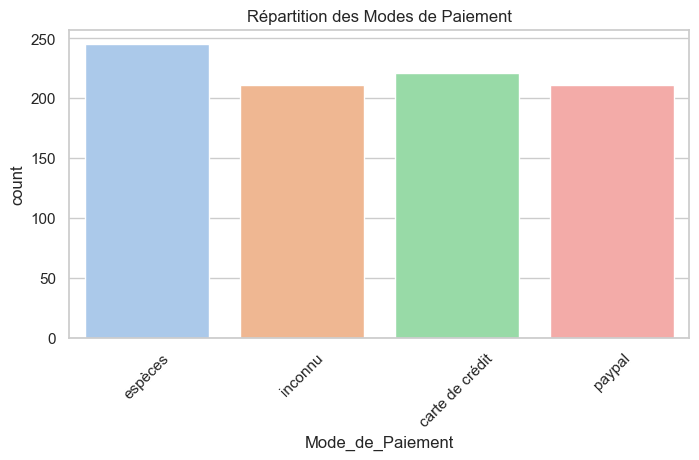

In [35]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Mode_de_Paiement', data=df, palette='pastel')
plt.title("Répartition des Modes de Paiement")
plt.xticks(rotation=45)
plt.show()

#### Répartition des produits

In [36]:
print("\nRépartition des Produits :")
df['Produit'].value_counts()


Répartition des Produits :


Produit
Bureau             232
Chaise             228
Table              220
Produit inconnu    208
Name: count, dtype: int64

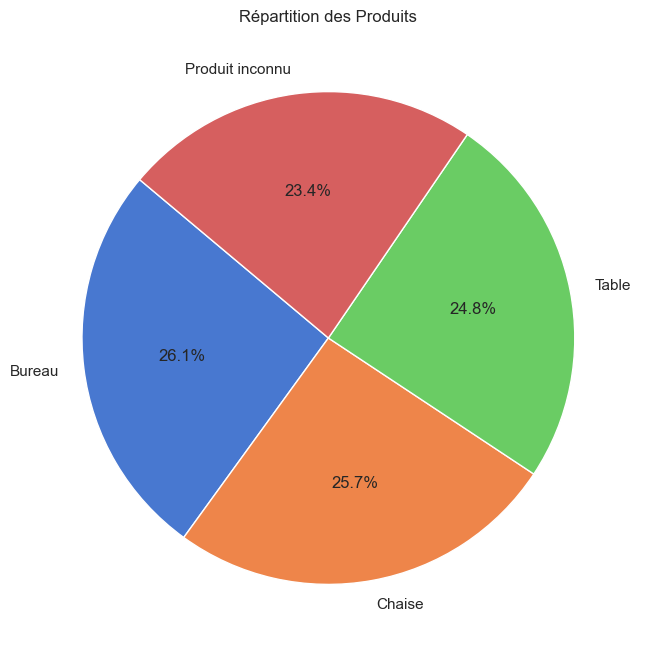

In [37]:
produit_counts = df['Produit'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(produit_counts, labels=produit_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title("Répartition des Produits")
plt.show()

In [38]:
# Calcul des ventes totales par produit
product_sales = df.groupby('Produit')['Total'].sum().sort_values(ascending=False)
product_sales_percent = (product_sales / product_sales.sum()) * 100

product_sales_df = pd.DataFrame({'Vente Totale': product_sales, 'Pourcentage (%)': product_sales_percent})
product_sales_df

,Vente Totale,Pourcentage (%)
Produit,,
Chaise,176173.07,26.981218
Table,166460.16,25.493669
Bureau,158593.52,24.288879
Produit inconnu,151720.31,23.236234


### 4.2 Analyse Bivariée et Multivariée

In [39]:
# Matrice de corrélation entre Quantité, Prix_Unitaire et Total
corr_matrix = df[['Quantité', 'Prix_Unitaire', 'Total']].corr()
print("\nMatrice de corrélation :")
corr_matrix


Matrice de corrélation :


,Quantité,Prix_Unitaire,Total
Quantité,1.000000,0.011976,0.555910
Prix_Unitaire,0.011976,1.000000,0.747512
Total,0.555910,0.747512,1.000000


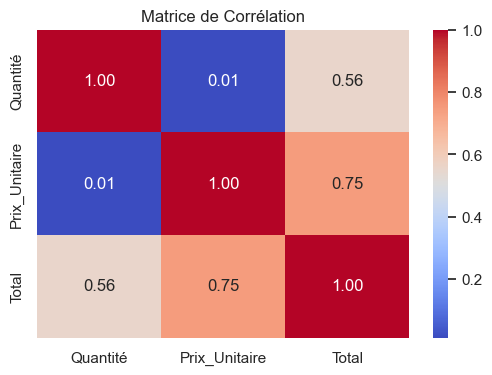

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.savefig("heatmap_corr.png", dpi=300, bbox_inches='tight')
plt.show()

In [41]:
# corrélation prix unitaire et total
correlation = corr_matrix.iloc[1, 2]
print(f"Corrélation entre Prix_Unitaire et Total : {correlation:.2f}")

# Test de significativité
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Prix_Unitaire'], df['Total'])
print(f"P-valeur du test de corrélation : {p_value:.5f}")

Corrélation entre Prix_Unitaire et Total : 0.75
P-valeur du test de corrélation : 0.00000


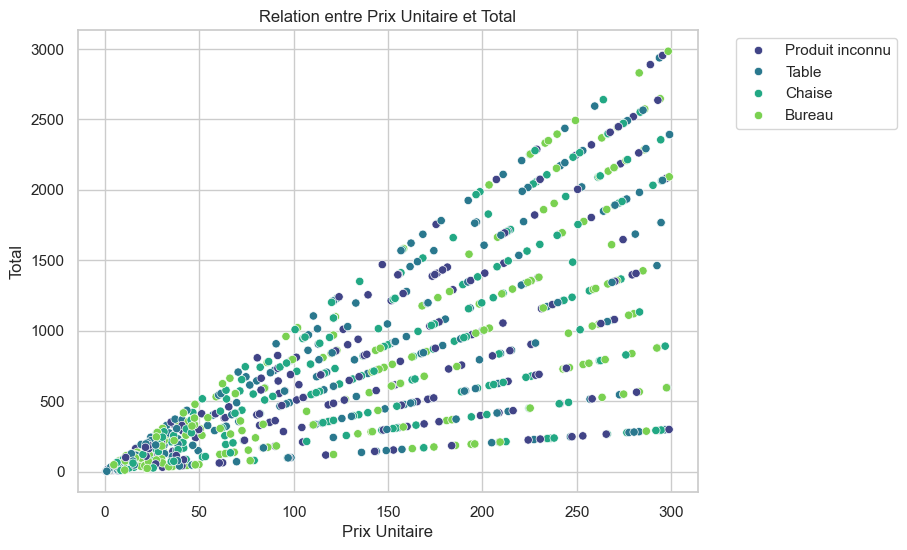

In [42]:
# Scatter plot entre Prix_Unitaire et Total
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Prix_Unitaire', y='Total', data=df, hue='Produit', palette='viridis')
plt.title("Relation entre Prix Unitaire et Total")
plt.xlabel("Prix Unitaire")
plt.ylabel("Total")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

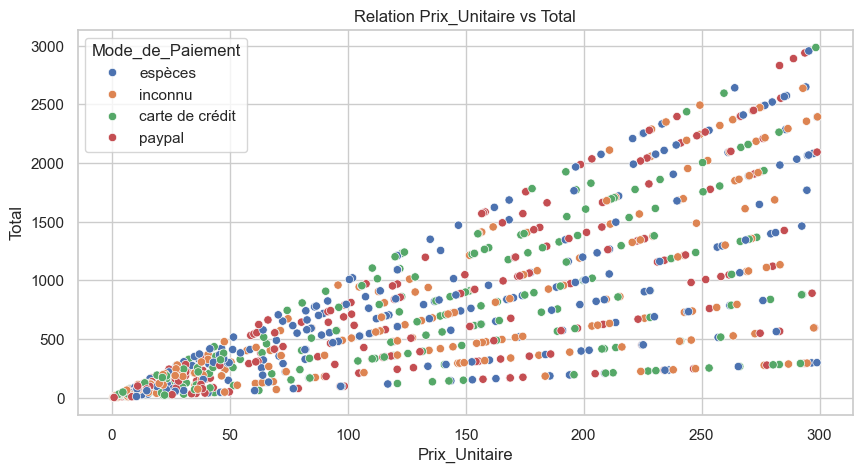

In [43]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Prix_Unitaire'], y=df['Total'], hue=df['Mode_de_Paiement'])
plt.title("Relation Prix_Unitaire vs Total")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11188\3778670038.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\ACER\AppData\Local\Temp\ipykernel_11188\3778670038.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
C:\Users\ACER\AppData\Local\Temp\ipykernel_11188\3778670038.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)


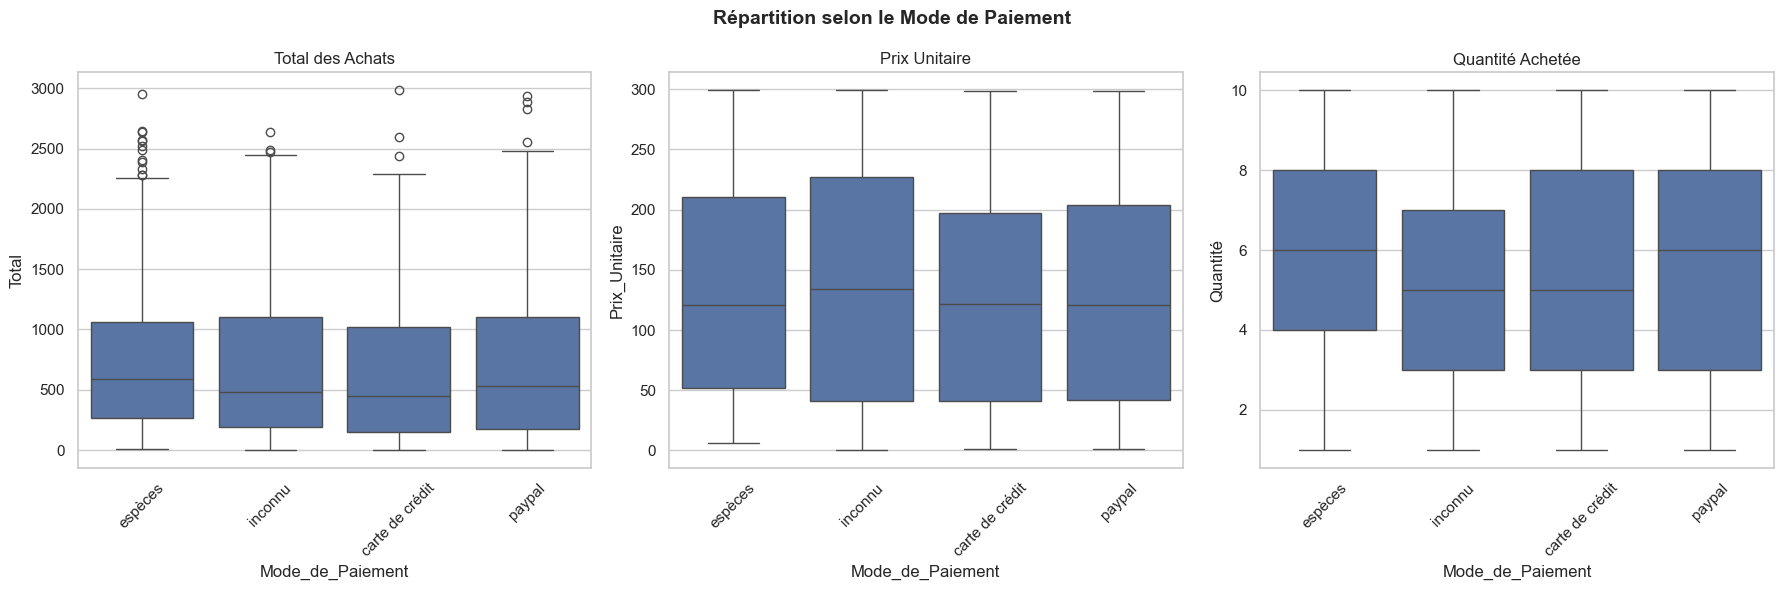

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

sns.boxplot(x=df['Mode_de_Paiement'], y=df['Total'], ax=axes[0])
axes[0].set_title("Total des Achats")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.boxplot(x=df['Mode_de_Paiement'], y=df['Prix_Unitaire'], ax=axes[1])
axes[1].set_title("Prix Unitaire")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

sns.boxplot(x=df['Mode_de_Paiement'], y=df['Quantité'], ax=axes[2])
axes[2].set_title("Quantité Achetée")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

fig.suptitle("Répartition selon le Mode de Paiement", fontsize=14, fontweight='bold')

plt.tight_layout() 
plt.show()

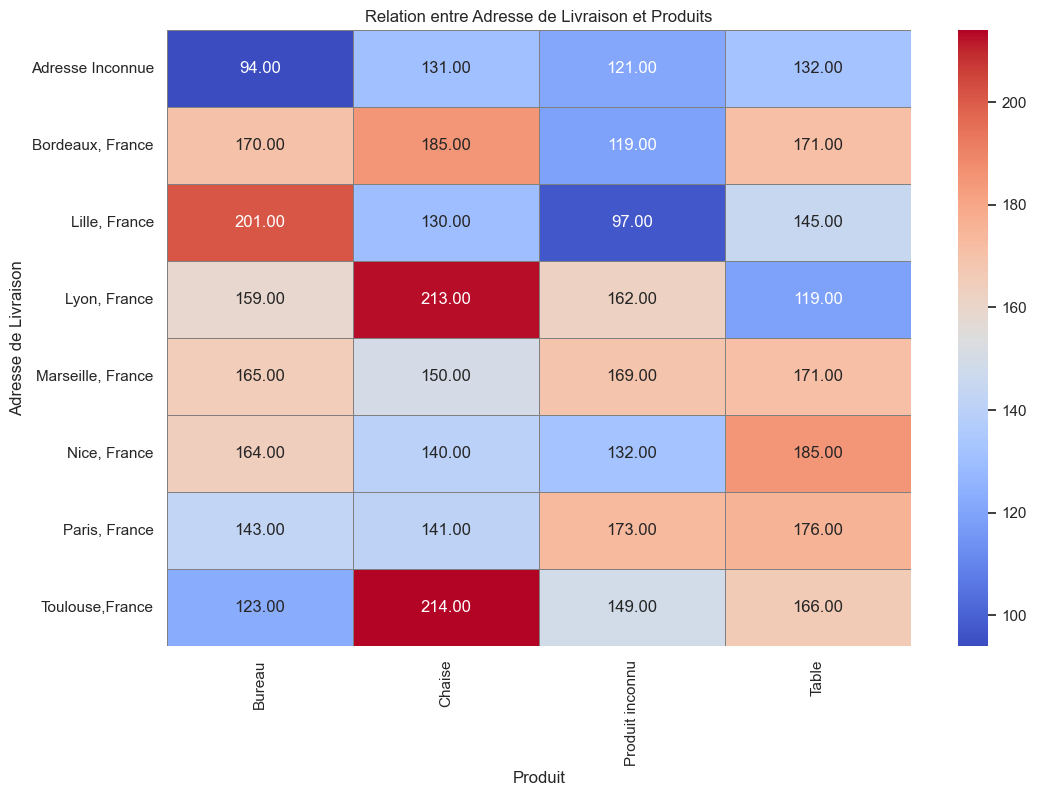

In [45]:
pivot_table = df.pivot_table(index="Adresse_Livraison", columns="Produit", values="Quantité", aggfunc="sum", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot = True, cmap="coolwarm", linewidths=0.5, linecolor="gray", fmt=".2f")
plt.title("Relation entre Adresse de Livraison et Produits")
plt.xlabel("Produit")
plt.ylabel("Adresse de Livraison")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()


In [46]:
# Similaires clients
client = df.groupby(['Nom_Client', 'Adresse_Livraison'])['Total'].agg(['mean', 'std']).reset_index()

# Affichage des clients ayant des variations élevées
clients_var_high = client[client['std']/client['mean'] > 0.5]
print("Clients ayant une forte variation de dépenses :")
print(clients_var_high.head(10))

Clients ayant une forte variation de dépenses :
     Nom_Client  Adresse_Livraison        mean         std
0  Alice Martin   Adresse Inconnue  518.410833  495.262923
1  Alice Martin   Bordeaux, France  716.886250  806.778412
2  Alice Martin      Lille, France  509.249000  509.289507
3  Alice Martin       Lyon, France  657.933333  552.364398
4  Alice Martin  Marseille, France  907.678667  754.847904
5  Alice Martin       Nice, France  749.840909  676.479788
6  Alice Martin      Paris, France  600.355000  686.586975
7  Alice Martin    Toulouse,France  764.445000  706.528388
8    Bob Dupont   Adresse Inconnue  990.053636  872.625707
9    Bob Dupont   Bordeaux, France  470.207500  340.976408


In [47]:
# SImilaires adresses
client = df.groupby(['Adresse_Livraison','Nom_Client'])['Total'].agg(['mean', 'std']).reset_index()

# Affichage des clients ayant des variations élevées
clients_var_high = client[client['std']/client['mean'] > 0.5]
print("Adresses ayant une forte variation de dépenses :")
print(clients_var_high.tail(10))

Adresses ayant une forte variation de dépenses :
   Adresse_Livraison      Nom_Client         mean         std
62     Paris, France           Henry   635.400909  602.553365
63   Toulouse,France    Alice Martin   764.445000  706.528388
64   Toulouse,France      Bob Dupont   748.485455  605.884956
65   Toulouse,France         Charlie   637.475000  588.813458
66   Toulouse,France  Client Inconnu   465.037692  310.146888
67   Toulouse,France    David Pierre   613.930000  565.434739
68   Toulouse,France      Emma Smith  1071.755882  991.126743
69   Toulouse,France     Frank Ocean   624.492500  495.747760
70   Toulouse,France      George  Co   578.924000  574.729354
71   Toulouse,France           Henry   805.674286  860.403059


### 4.3. Analyse temporelle

In [48]:
# ventes par mois
df["Jour"] = df["Date"].dt.to_period("D")  
daily_sales = df.groupby("Jour")["Total"].sum()
daily_sales 

Jour
2025-01-01    29341.47
2025-01-02    21204.81
2025-01-03    16065.66
2025-01-04    18979.47
2025-01-05    16733.38
2025-01-06    22405.91
2025-01-07    31358.52
2025-01-08    10851.08
2025-01-09    10628.05
2025-01-10    17541.57
2025-01-11    19349.89
2025-01-12    19542.90
2025-01-13    22846.58
2025-01-14    17520.36
2025-01-15    27168.19
2025-01-16    23568.13
2025-01-17    27545.70
2025-01-18    24411.91
2025-01-19    20717.64
2025-01-20    27028.58
2025-01-21    25283.18
2025-01-22    20684.29
2025-01-23    12823.05
2025-01-24    17070.08
2025-01-25    19410.30
2025-01-26    24660.73
2025-01-27    15810.55
2025-01-28    21529.31
2025-01-29    28374.66
2025-01-30    21319.18
2025-01-31    21171.93
Freq: D, Name: Total, dtype: float64

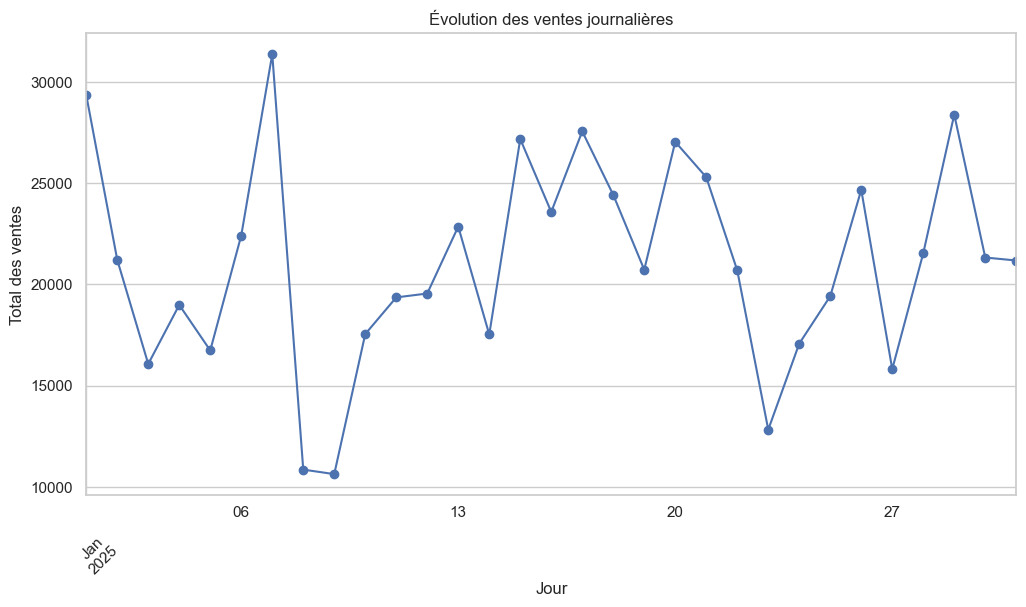

In [49]:
# Graphique des ventes journalières
plt.figure(figsize=(12, 6))
daily_sales.plot(marker='o')
plt.xticks(rotation=45)
plt.title("Évolution des ventes journalières")
plt.xlabel("Jour")
plt.ylabel("Total des ventes")
plt.savefig("trends_total.png", dpi=300, bbox_inches='tight')
plt.show()

In [50]:
# jours avec les ventes maximales et minimales
max_day = daily_sales.idxmax()
min_day = daily_sales.idxmin()
print(f"Jour avec le plus de ventes : {max_day}")
print(f" Jour avec le moins de ventes : {min_day}")

Jour avec le plus de ventes : 2025-01-07
 Jour avec le moins de ventes : 2025-01-09


In [51]:
# Produits les plus vendus pendant le jour record
top_products_max = df[df["Jour"] == max_day].groupby("Produit")["Quantité"].sum().sort_values(ascending=False)
print("\n Produits les plus vendus lors du jour record des ventes maximales :")
print(top_products_max)

# Mode de paiement le plus utilisé pendant le jour record
top_payment_max = df[df["Jour"] == max_day]["Mode_de_Paiement"].value_counts()
print("\n Mode de paiement dominant lors du jour record des ventes maximales :")
print(top_payment_max)


 Produits les plus vendus lors du jour record des ventes maximales :
Produit
Bureau             72.0
Chaise             68.0
Produit inconnu    55.0
Table              26.0
Name: Quantité, dtype: float64

 Mode de paiement dominant lors du jour record des ventes maximales :
Mode_de_Paiement
espèces            12
carte de crédit     8
inconnu             7
paypal              7
Name: count, dtype: int64


In [52]:
# Produits les moins vendus pendant le jour record min
top_products_min = df[df["Jour"] == min_day].groupby("Produit")["Quantité"].sum().sort_values(ascending=False)
print("\n Produits les plus vendus lors du jour record des ventes minimales :")
print(top_products_min)

# Mode de paiement le moins utilisé pendant le jour record min
top_payment_min = df[df["Jour"] == min_day]["Mode_de_Paiement"].value_counts()
print("\n Mode de paiement dominant lors du jour des ventes minimimales :")
print(top_payment_min)


 Produits les plus vendus lors du jour record des ventes minimales :
Produit
Produit inconnu    35.0
Chaise             29.0
Bureau             28.0
Table              25.0
Name: Quantité, dtype: float64

 Mode de paiement dominant lors du jour des ventes minimimales :
Mode_de_Paiement
paypal             7
carte de crédit    7
espèces            6
inconnu            1
Name: count, dtype: int64


In [53]:
# Extraction du jour de la semaine
df["Jour_Semaine"] = df["Date"].dt.day_name()

# Comptage des commandes par client
client_orders = df.groupby(['Nom_Client', 'Adresse_Livraison'])["Date"].count().reset_index()
client_orders.columns = ["Nom_Client",'Adresse_Livraison', "Nb_commandes"]

# Clients réguliers (ceux qui commandent au moins 20 fois le mois)
regular_clients = client_orders[client_orders["Nb_commandes"] >= 20]

reg_clients = df[df["Nom_Client"].isin(regular_clients["Nom_Client"])]
reg_clients.head(5)

,Date,Nom_Client,Produit,Quantité,Prix_Unitaire,Total,Mode_de_Paiement,Adresse_Livraison,Pays,Ville,Total_Calc,Incoherence,Type_Transaction,Année,Mois,Jour,Jour_Semaine
0,2025-01-03,Emma Smith,Produit inconnu,2.0,7.92,15.84,espèces,"Toulouse,France",France,Toulouse,-15.84,False,REMBOURSEMENT,2025,1,2025-01-03,Friday
1,2025-01-22,Emma Smith,Table,7.0,69.84,488.88,espèces,"Nice, France",France,Nice,488.88,False,VENTE,2025,1,2025-01-22,Wednesday
6,2025-01-13,David Pierre,Produit inconnu,5.0,144.27,721.35,inconnu,"Bordeaux, France",France,Bordeaux,721.35,False,VENTE,2025,1,2025-01-13,Monday
8,2025-01-29,Emma Smith,Table,10.0,234.48,2344.80,inconnu,"Bordeaux, France",France,Bordeaux,2344.80,False,VENTE,2025,1,2025-01-29,Wednesday
9,2025-01-31,Charlie,Produit inconnu,3.0,115.98,347.94,paypal,"Lille, France",France,Lille,347.94,False,VENTE,2025,1,2025-01-31,Friday


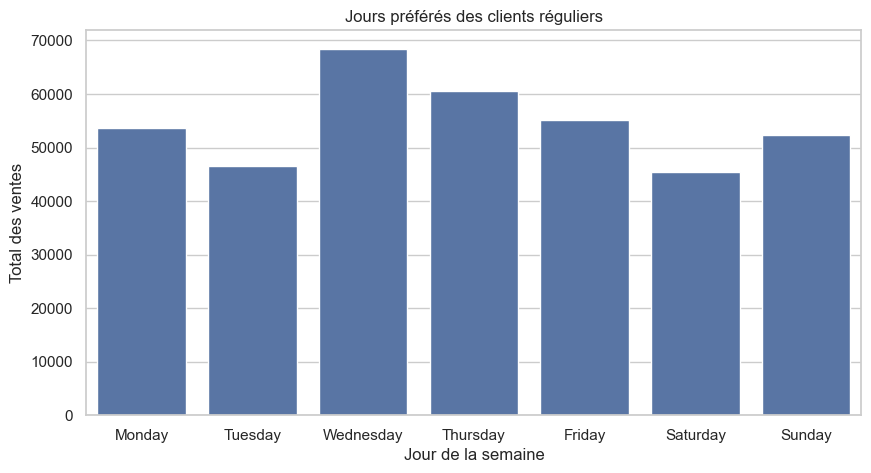

In [54]:
# Graphique des jours d'achat préférés
weekly_orders = reg_clients.groupby("Jour_Semaine")["Total"].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_orders.index, y=weekly_orders.values, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Jours préférés des clients réguliers")
plt.xlabel("Jour de la semaine")
plt.ylabel("Total des ventes")
plt.show()

### 4.4 Quantité élevée vs Produits couteux

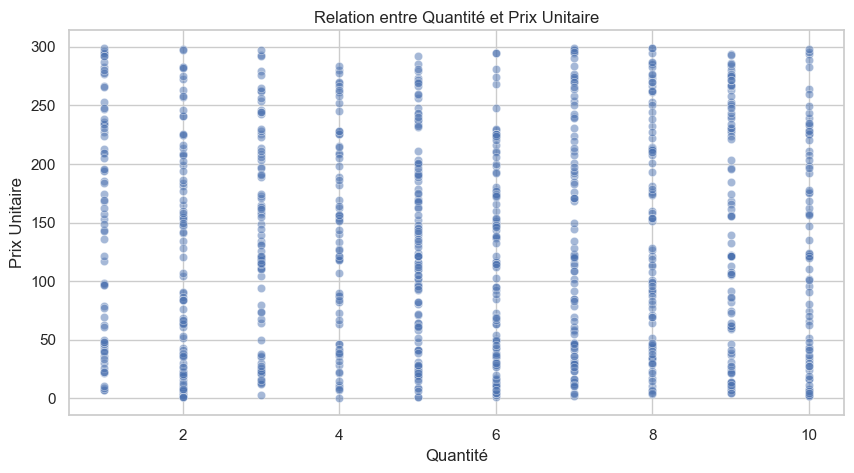

In [55]:
# Scatter plot Quantité vs Prix Unitaire
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Quantité"], y=df["Prix_Unitaire"], alpha=0.5)
plt.title("Relation entre Quantité et Prix Unitaire")
plt.xlabel("Quantité")
plt.ylabel("Prix Unitaire")
plt.show()

In [56]:
# Calcul du coefficient de corrélation
correlation = df["Quantité"].corr(df["Prix_Unitaire"])
print(f" Corrélation entre Quantité et Prix Unitaire : {correlation:.2f}")

 Corrélation entre Quantité et Prix Unitaire : 0.01


In [75]:
# 20 transactions avec la plus grande quantité
top_quantities = df.nlargest(20, "Quantité")

# Affichage des résultats
print("\n 20 transactions avec la plus grande Quantité :")
print(top_quantities)

# médiane du prix unitaire dans ces 10 transactions
median_price_top = top_quantities["Prix_Unitaire"].median()
median_price_all = df["Prix_Unitaire"].median()

print(f"\n Médiane du Prix Unitaire des 10 plus grosses Quantités : {median_price_top:.2f}")
print(f" Médiane du Prix Unitaire global : {median_price_all:.2f}")

# Conclusion
if median_price_top < median_price_all:
    print(" Les produits les plus achetés en grande quantité sont en moyenne moins chers.")
else:
    print(" Aucune tendance claire : les produits à grande quantité ne sont pas systématiquement moins chers.")



 20 transactions avec la plus grande Quantité :
          Date      Nom_Client          Produit  Quantité  Prix_Unitaire  \
8   2025-01-29      Emma Smith            Table      10.0         234.48   
12  2025-01-20    David Pierre           Chaise      10.0          16.85   
30  2025-01-17    Alice Martin            Table      10.0           1.73   
31  2025-01-17      Emma Smith            Table      10.0         293.76   
34  2025-01-17      George  Co           Bureau      10.0         121.12   
45  2025-01-16    David Pierre           Bureau      10.0         158.29   
65  2025-01-18         Charlie            Table      10.0           7.22   
95  2025-01-28    Alice Martin           Chaise      10.0         123.02   
96  2025-01-20  Client Inconnu           Bureau      10.0           7.66   
109 2025-01-17  Client Inconnu  Produit inconnu      10.0          16.28   
117 2025-01-18  Client Inconnu           Bureau      10.0         239.57   
128 2025-01-19           Henry         

### 4.5. Analyse géographique

In [58]:
print("Ventes par ville:")
print(df.groupby('Adresse_Livraison')['Total'].sum().sort_values(ascending=False))

Ventes par ville:
Adresse_Livraison
Marseille, France    92222.08
Lille, France        89365.97
Toulouse,France      87903.68
Lyon, France         86209.29
Bordeaux, France     81653.94
Paris, France        79594.76
Nice, France         73955.52
Adresse Inconnue     62041.82
Name: Total, dtype: float64


In [59]:
# Top 2 des produits par ville
top_products_by_city = df.groupby(['Adresse_Livraison', 'Produit'])['Quantité'].sum().reset_index()
top_products_by_city = top_products_by_city.sort_values(['Adresse_Livraison', 'Quantité'], ascending=[True, False])


for city in top_products_by_city['Adresse_Livraison'].unique()[:5]:
    print(f"\nVille : {city}")
    print(top_products_by_city[top_products_by_city['Adresse_Livraison'] == city].head(2))


Ville : Adresse Inconnue
  Adresse_Livraison Produit  Quantité
3  Adresse Inconnue   Table     132.0
1  Adresse Inconnue  Chaise     131.0

Ville : Bordeaux, France
  Adresse_Livraison Produit  Quantité
5  Bordeaux, France  Chaise     185.0
7  Bordeaux, France   Table     171.0

Ville : Lille, France
   Adresse_Livraison Produit  Quantité
8      Lille, France  Bureau     201.0
11     Lille, France   Table     145.0

Ville : Lyon, France
   Adresse_Livraison          Produit  Quantité
13      Lyon, France           Chaise     213.0
14      Lyon, France  Produit inconnu     162.0

Ville : Marseille, France
    Adresse_Livraison          Produit  Quantité
19  Marseille, France            Table     171.0
18  Marseille, France  Produit inconnu     169.0


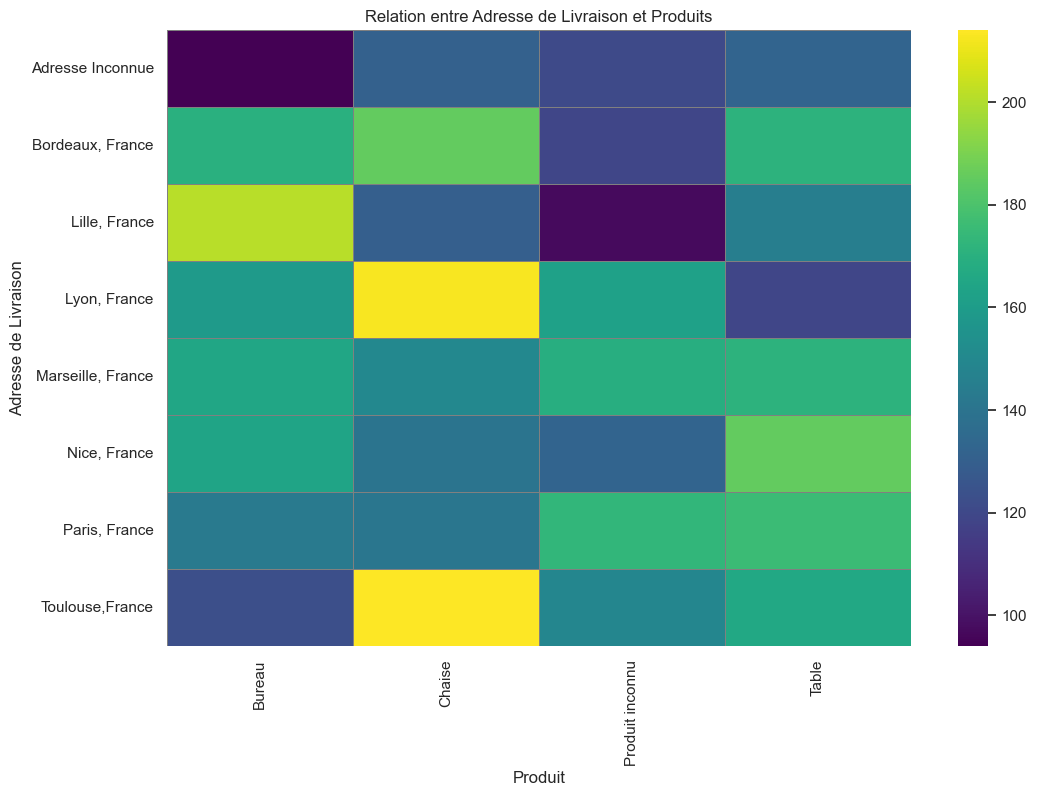

In [60]:
pivot_table = df.pivot_table(index="Adresse_Livraison", columns="Produit", values="Quantité", aggfunc="sum", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="viridis", linewidths=0.5, linecolor="gray")

plt.title("Relation entre Adresse de Livraison et Produits")
plt.xlabel("Produit")
plt.ylabel("Adresse de Livraison")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

In [61]:
import scipy.stats as stats
contingency_table = pd.crosstab(df["Adresse_Livraison"], df["Produit"])

# Test du Khi-2
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f" Test du Khi-2 :\nChi2 = {chi2:.2f}, p-value = {p_value:.5f}")

if p_value < 0.05:
    print("La liaison entre les Produits et les Adresses est statistiquement significative (p < 0.05)")
else:
    print("Aucune preuve d'une liaison significative entre les Produits et les Adresses (p >= 0.05)")


 Test du Khi-2 :
Chi2 = 17.63, p-value = 0.67221
Aucune preuve d'une liaison significative entre les Produits et les Adresses (p >= 0.05)


In [62]:
payment_by_region = pd.crosstab(df["Adresse_Livraison"], df["Mode_de_Paiement"])
payment_by_region

Mode_de_Paiement,carte de crédit,espèces,inconnu,paypal
Adresse_Livraison,,,,
Adresse Inconnue,20,26,20,17
"Bordeaux, France",29,27,34,24
"Lille, France",24,31,29,26
"Lyon, France",37,33,20,26
"Marseille, France",26,32,21,41
"Nice, France",20,34,29,29
"Paris, France",31,29,29,18
"Toulouse,France",34,33,29,30


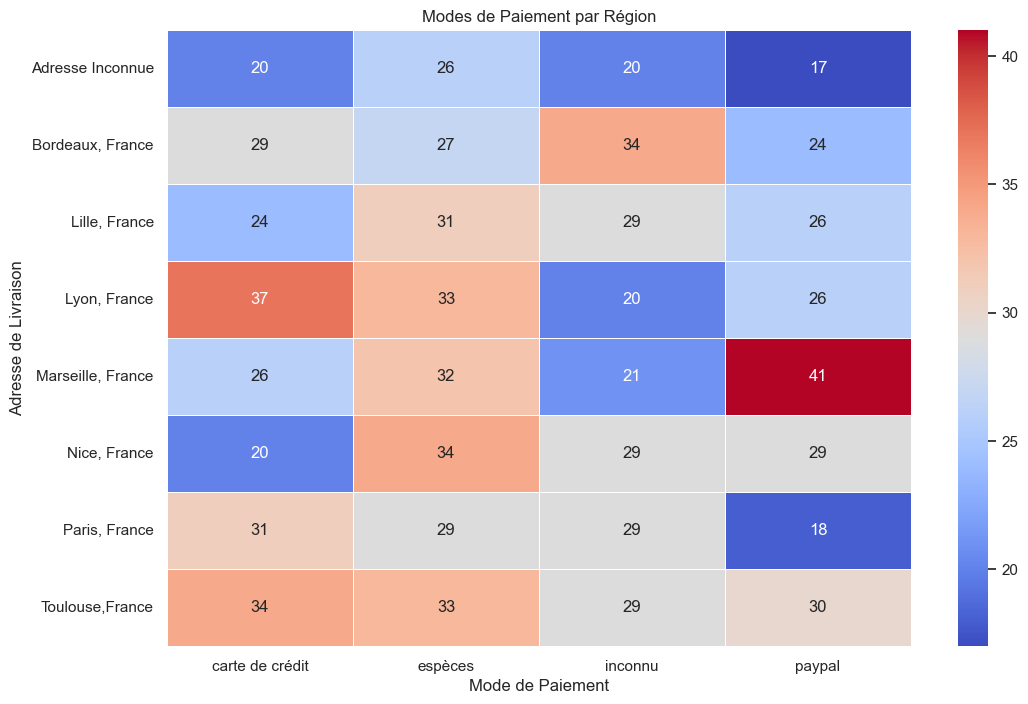

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(payment_by_region, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)

# Personnalisation
plt.title("Modes de Paiement par Région")
plt.xlabel("Mode de Paiement")
plt.ylabel("Adresse de Livraison")
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [64]:
import scipy.stats as stats
# Test du Khi-2
chi2, p_value, dof, expected = stats.chi2_contingency(payment_by_region)
print(f" Test du Khi-2 :\nChi2 = {chi2:.2f}, p-value = {p_value:.5f}")

if p_value < 0.05:
    print(" Les modes de paiement sont significativement différents selon les régions (p < 0.05)")
else:
    print(" Il n'y a pas de différence statistique significative entre les modes de paiement et les régions (p >= 0.05)")


 Test du Khi-2 :
Chi2 = 23.50, p-value = 0.31806
 Il n'y a pas de différence statistique significative entre les modes de paiement et les régions (p >= 0.05)


### 4.6. Segmentation et catégorisation

In [65]:
print("Top 5 clients les plus lucratifs:")
print(df.groupby('Nom_Client')['Total'].sum().sort_values(ascending=False).head(5))

Top 5 clients les plus lucratifs:
Nom_Client
Client Inconnu    90103.32
David Pierre      82611.54
Emma Smith        80841.49
Bob Dupont        74699.53
George  Co        71474.89
Name: Total, dtype: float64


In [66]:
# Regroupement des clients par volume et fréquence d'achat
client_data = df.groupby("Nom_Client").agg(
    total_achat=("Total", "sum"),
    fréquence=("Date", "count"),
    produit_favori=("Produit", lambda x: x.mode()[0])  # Produit le plus acheté
).reset_index()

client_data

,Nom_Client,total_achat,fréquence,produit_favori
0,Alice Martin,69692.92,101,Table
1,Bob Dupont,74699.53,99,Bureau
2,Charlie,56858.51,82,Chaise
3,Client Inconnu,90103.32,117,Bureau
4,David Pierre,82611.54,111,Table
5,Emma Smith,80841.49,104,Chaise
6,Frank Ocean,62585.07,83,Bureau
7,George Co,71474.89,101,Produit inconnu
8,Henry,64079.79,90,Bureau


In [67]:
from itertools import combinations
from collections import Counter

ventes_df = df[df["Type_Transaction"] == 'VENTE']

# Création des paires de produits achetés ensemble
transactions = ventes_df.groupby(["Nom_Client", 'Date'])["Produit"].apply(list)
product_pairs = [tuple(sorted(pair)) for sublist in transactions for pair in combinations(sublist, 2)]
pair_counts = Counter(product_pairs)

product_matrix = pd.DataFrame(pair_counts.items(), columns=["Produit_Pair", "Nombre"])
product_matrix[["Produit_1", "Produit_2"]] = pd.DataFrame(product_matrix["Produit_Pair"].tolist(), index=product_matrix.index)
product_matrix = product_matrix[product_matrix["Produit_1"] != product_matrix["Produit_2"]]
product_matrix = product_matrix.drop(columns=["Produit_Pair"])
product_matrix = product_matrix.sort_values(by="Nombre", ascending=False)
product_matrix

,Nombre,Produit_1,Produit_2
0,154,Bureau,Chaise
4,143,Bureau,Table
6,126,Bureau,Produit inconnu
2,125,Chaise,Table
5,117,Chaise,Produit inconnu
8,113,Produit inconnu,Table


### 4.7. 80/20 chiffre d'affaires par produit

C:\Users\ACER\AppData\Local\Temp\ipykernel_11188\4191458279.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(pareto_data.index, rotation=90)


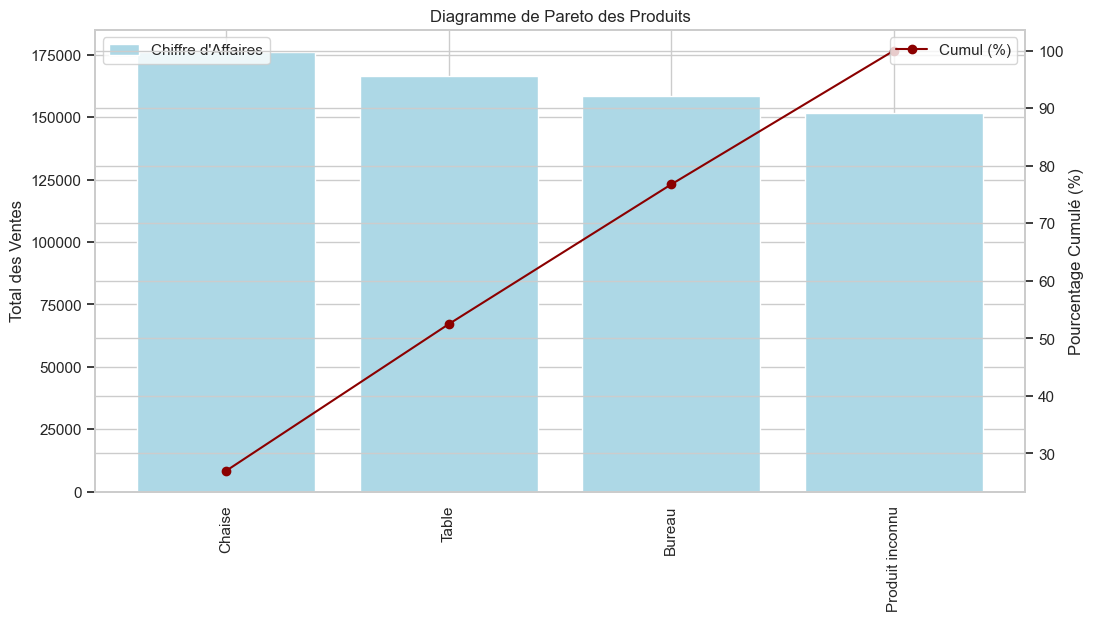

In [68]:
# Calcul du chiffre d'affaires par produit
pareto_data = df.groupby("Produit")["Total"].sum().sort_values(ascending=False)
pareto_cumsum = pareto_data.cumsum() / pareto_data.sum() * 100

# Graphique Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart 
ax1.bar(pareto_data.index, pareto_data, color="lightblue", label="Chiffre d'Affaires")
ax1.set_ylabel("Total des Ventes")
ax1.set_xticklabels(pareto_data.index, rotation=90)

# Courbe cumulative (80/20)
ax2 = ax1.twinx()
ax2.plot(pareto_cumsum.index, pareto_cumsum, color="darkred", marker="o", label="Cumul (%)")
ax2.set_ylabel("Pourcentage Cumulé (%)")

plt.title("Diagramme de Pareto des Produits")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


### 4.8. Tests et modèles statistiques

In [69]:
from scipy.stats import f_oneway

# Liste des groupes par Mode de Paiement
groupes = [df[df["Mode_de_Paiement"] == mode]["Total"] for mode in df["Mode_de_Paiement"].unique()]

# Test ANOVA
anova_stat, anova_p_value = f_oneway(*groupes)

# Résultats
print(f"ANOVA Test : F-stat = {anova_stat:.2f}, p-value = {anova_p_value:.5f}")

# Interprétation
if anova_p_value < 0.05:
    print("Les montants des transactions varient significativement selon le mode de paiement.")
else:
    print("Pas de différence significative entre les modes de paiement.")


ANOVA Test : F-stat = 1.40, p-value = 0.24009
Pas de différence significative entre les modes de paiement.


In [70]:
groupes = [df[df["Produit"] == mode]["Total"] for mode in df["Produit"].unique()]

# Test ANOVA
anova_stat, anova_p_value = f_oneway(*groupes)

# Résultats
print(f"ANOVA Test : F-stat = {anova_stat:.2f}, p-value = {anova_p_value:.5f}")

# Interprétation
if anova_p_value < 0.05:
    print("Les montants des transactions varient significativement selon les produits.")
else:
    print("Pas de différence significative entre les produits.")


ANOVA Test : F-stat = 0.74, p-value = 0.52767
Pas de différence significative entre les produits.


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sélection des variables indépendantes et dépendantes
X = df[["Quantité", "Prix_Unitaire"]]
y = df["Total"]

# Division des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"Coefficients du modèle : {model.coef_}")
print(f"Score R² : {r2:.2f}")

# Interprétation
if r2 > 0.75:
    print("Le modèle explique bien la variance du Total. Plus de 75%")
else:
    print("Le modèle n'explique pas suffisamment la variance du Total.")


Coefficients du modèle : [133.06842066   5.59319697]
Score R² : 0.87
Le modèle explique bien la variance du Total. Plus de 75%


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Extraction du jour de la semaine
df["Jour_Semaine"] = df["Date"].dt.dayofweek  # 0 = Lundi, 6 = Dimanche

# Encodage du mode de paiement (OneHotEncoding)
df = pd.get_dummies(df, columns=["Mode_de_Paiement"], drop_first=True)

# Sélection des variables explicatives
X = df[["Quantité", "Prix_Unitaire", "Jour_Semaine"] + [col for col in df.columns if "Mode_de_Paiement" in col]]
y = df["Total"]

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des variables numériques
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()


In [73]:
# Modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)

print(f"Score R² (Random Forest) : {r2_rf:.2f}")

Score R² (Random Forest) : 0.98
